## Caracteres compuestos
Imagina que en una población concreta un gen implicado en el desarrollo del antebrazo presenta dos alelos: uno dominante **A**, que determina un antebrazo de 28 cm, y uno recesivo **a** que en homocigosis determina un antebrazo de 25 cm. Además, en la población existe otro gen polimórfico con dos alelos que afecta la longitud del húmero, con un alelo dominante **B** que determina un húmero de 32 cm y un alelo recesivo **b**, que determina un húmero de 29 cm. En la población existen, por tanto, cuatro longitudes posibles del brazo, desde el hombro hasta la muñeca:

| Genotipo | Longitud total |
| -------- | -------------- |
|  A- B-   |  28 + 33 = 61  |
|  A- bb   |  28 + 29 = 57  |
|  aa B-   |  25 + 33 = 58  |
|  aa bb   |  25 + 29 = 54  |

El bloque siguiente ejecuta una simulación de un cruce entre dos dobles hetercigotos, con una descendencia de 2000 individuos, en la que se pueden apreciar las proporciones Mendelianas de un cruce dihíbrido típico, 9:3:3:1.
 

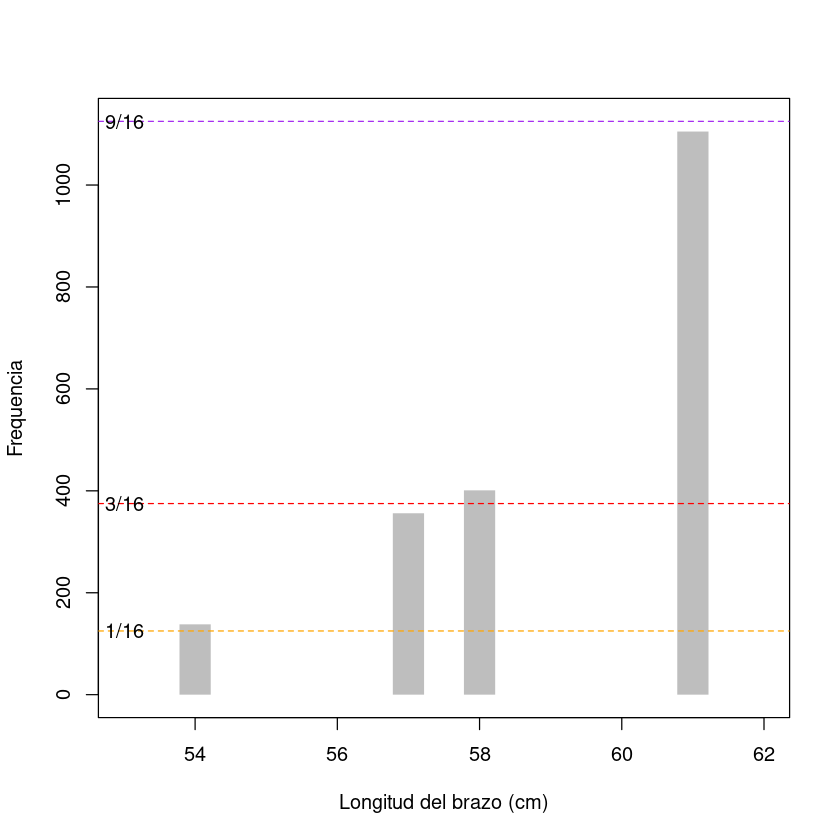

In [1]:
system2('quantinemo', args = 'dihibrid/cross.ini')
arm_lengths <- read.table('results/sim_g2.gen', skip = 2)$V2
arm_table   <- table(arm_lengths)
plot(c(53, 62), c(0, max(c(1125, table(arm_lengths)))),
     type = 'n', xlab = 'Longitud del brazo (cm)', ylab = 'Frequencia')
lines(as.numeric(names(arm_table)), arm_table, type='h', lwd=25, lend=1, col='gray')
abline(h=2000*c(1,3,9)/16, lty=2, col=c('orange','red','purple'))
text(x = 53, y = 2000 * c(1,3,9)/16, labels = c('1/16', '3/16', '9/16'))

[1] "/home/joiglu/Documents/docencia/binders/Genetica"